# AirBnB
### Data from:   http://insideairbnb.com/
#### This data was updated on 2019 based on New York housing data.

## 1. Look around the data

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)


In [2]:
bnb = pd.read_csv("AB_NYC_2019.csv")
bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Column descriptions: 

##### id:  
##### name:  the name of AirBnB
##### host_id:   host's ID
##### host_name: hosts' names 
##### neighbourhood_group:  Regions  such as Brooklyn, Manhattan ...
##### neighbourhood: cities such as Harlem, Midtown ....
##### latitude:  
##### longitude: 
##### room_type:  Private or Entire home/apt .. 
##### price: 
##### minimum_nights:  
##### number_of_reviews:
##### last_review:  the recent dates that reviews were made
##### reviews_per_month:
##### calculated_host_listings_count: total number of Airbnb rentals available to hosts
##### availability_365: available: number of rental days during a year

In [3]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Categorical Variables:
# name, host_name, neighbourhood_group, neighbourhood, room_type

In [5]:
# Contiunuous Variables:
# id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review,
# reviews_per_month, calculated_host_listings_count, availability_365

In [6]:
# Data Summary
print("The total number of data: ", bnb.shape[0]*bnb.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the total".format(bnb.isnull().sum().sum(), (bnb.isnull().sum().sum()*100)/(bnb.shape[0]*bnb.shape[1])))
print("The number of Host ID: {}, the number of hosts {}".format(bnb['host_id'].nunique(), bnb['host_name'].nunique()))
print("The average price per nights in New York on 2019: {:.2f}$ ".format(bnb['price'].mean()))

The total number of data:  782320
The total number of null values: 20141 and it occupies 2.57% of the total
The number of Host ID: 37457, the number of hosts 11452
The average price per nights in New York on 2019: 152.72$ 


## 2.Questions
### *Who is the most listed in AirBnB?
### *What is the most cheapest room and expensive room depending on regions?
### *Which regions were recorded the most expensive?
### *Is the type of AirBnB different according to regions?
### *Can I predict the price of AirBnB?

## 3. Data Preprocessing

In [7]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#Visualize the null values.
import missingno

<AxesSubplot:>

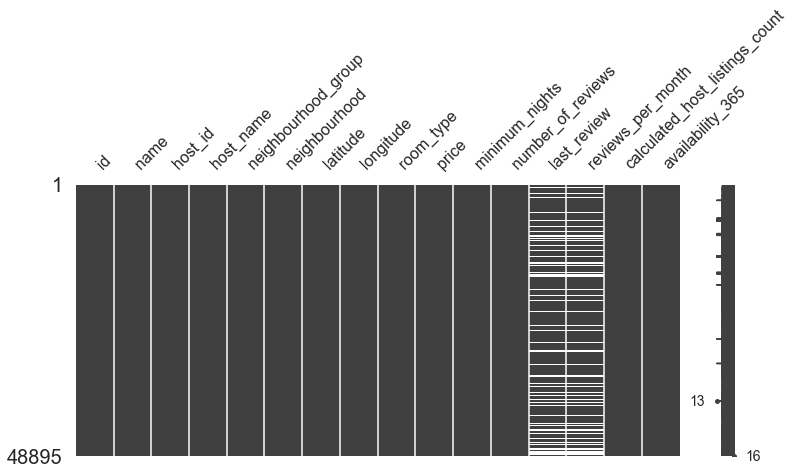

In [9]:
missingno.matrix(bnb, figsize=(12,5))

<AxesSubplot:>

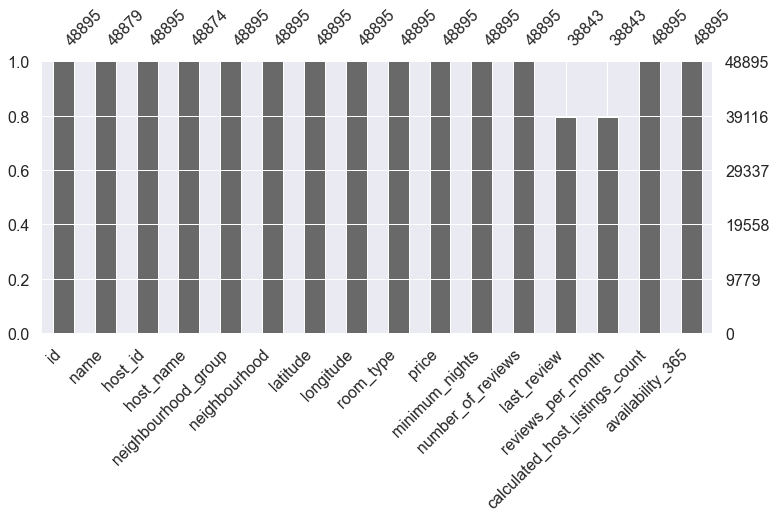

In [10]:
#bar chart
missingno.bar(bnb, figsize=(12,5))

In [11]:
#preprocess the NaN values.
bnb.fillna({'last_review' : 0}, inplace = True)
bnb.fillna({'reviews_per_month' : 0}, inplace = True)
bnb.fillna({'name' : "NoName"}, inplace = True)

In [12]:
# Remove unnecessary columns.
bnb.drop(['id', 'last_review'], axis = 1, inplace = True)

In [13]:
# Check if there is as same name as host_name.
bnb[bnb['name'] == bnb['host_name']]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9473,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90
24607,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,0.05,18,180
26734,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,0.00,18,365
26752,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,0.05,18,365
26753,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,0.09,18,365
26889,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,0.00,18,365


In [14]:
# Check if there is duplicated columns.
bnb.duplicated().sum()

0

In [15]:
# Remove all the duplicates
bnb.drop_duplicates(inplace = True)

In [16]:
bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
# Check if there is data that the price is 0!
len(bnb[bnb['price'] == 0])

11

In [18]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

## 4.EDA & Visualization

### 4-1. Simple Analysis

(-1000.0, 6000.0)

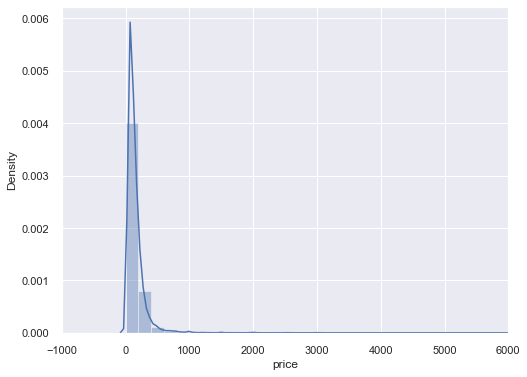

In [19]:
# The distribution of price in New York AirBnB.
f, ax = plt.subplots(1,1, figsize=(8,6))

sns.distplot(bnb['price'], hist= True, ax=ax)

#adjust the range of x-axis since the data seems to be skewed to one side!
ax.set_xlim(-1000, 6000)

In [20]:
# Skewness and Kurtosis!
# Skewness: a measure of the asymmetry of a distribution
# -3 < skewness < 3 >> normal!
# Kurtosis: a measure of the combined weight of a distribution's tails relative to the center of the distribution.
# The kurtosis of Normal distribution: 0
print("Skewness: %.2f" % bnb['price'].skew())
print("Kurtosis: %.2f" % bnb['price'].kurt())

Skewness: 19.12
Kurtosis: 585.67


In [21]:
pd.concat([bnb['price'], bnb['minimum_nights']], axis=1)

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

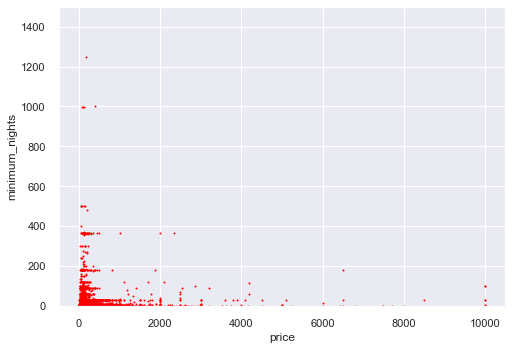

In [22]:
# Identify the relationship between 'price' and 'minimum_nights'
bnb.plot.scatter(x = 'price', y = 'minimum_nights', ylim=(0,1500), s=0.9, color='red')

# prcie 0 seems weird!.
# As below, there are some outliers!

<AxesSubplot:xlabel='price'>

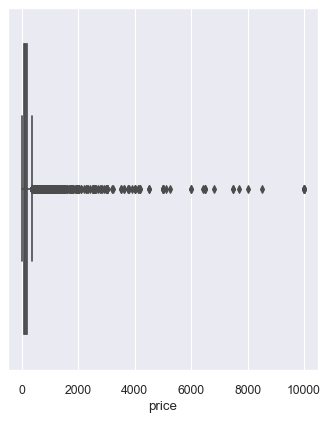

In [23]:
# Identify the distribution of price by using box plot.

f, ax = plt.subplots(1,1, figsize=(5,6), dpi=80)

#box plot
sns.boxplot(bnb['price'], showfliers = True, ax=ax)
#There are some outliers hence we should be careful to analyze the data.

Text(0.5, 1.0, 'Correlation map for AirBnB Data')

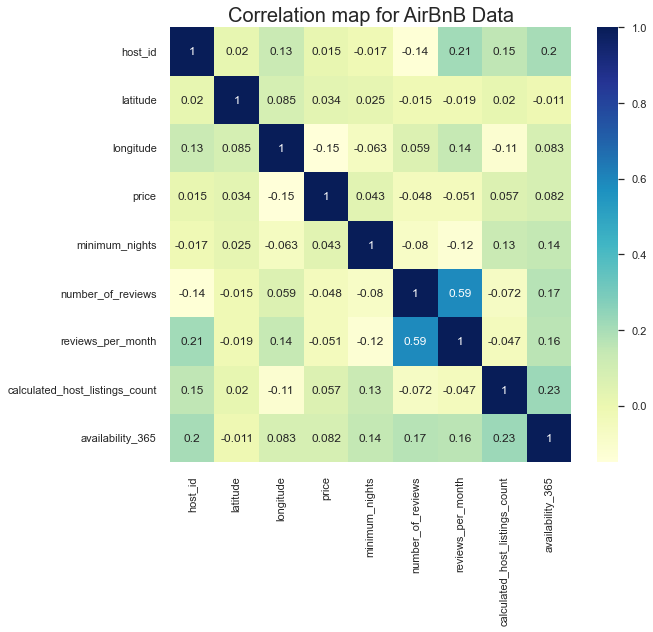

In [24]:
#Identify the correlation of the each columns by HEATMAP.
f, ax = plt.subplots(1,1, figsize=(9,8))

corrmat = bnb.corr()
sns.heatmap(corrmat, annot = True, cmap = 'YlGnBu', ax=ax)
plt.title("Correlation map for AirBnB Data", size = 20)



### 4-2. Remove the outliers with setting threshold in price.

In [25]:
min_threshold, max_threshold = bnb['price'].quantile([0.01,0.99])
min_threshold, max_threshold

(30.0, 799.0)

In [26]:
bnb[bnb['price'] < min_threshold]
# less than min_threshold: 404 obs

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0.92,1,226
2675,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0.07,1,321
2860,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0.00,4,137
3020,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5.53,3,50
3918,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1.00,1,322
48647,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0.00,1,24
48832,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0.00,3,363
48867,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0.00,6,338


In [27]:
bnb[bnb['price'] > max_threshold]
# greater than max_threshold: 404 obs

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
85,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
496,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
662,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249
762,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
780,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0.00,1,222
48305,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0.00,1,270
48523,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0.00,1,349
48535,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,0.00,1,303


In [28]:
bnb_thr = bnb[(bnb['price'] > min_threshold) & (bnb['price'] < max_threshold)]
bnb_thr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47744 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            47744 non-null  object 
 1   host_id                         47744 non-null  int64  
 2   host_name                       47724 non-null  object 
 3   neighbourhood_group             47744 non-null  object 
 4   neighbourhood                   47744 non-null  object 
 5   latitude                        47744 non-null  float64
 6   longitude                       47744 non-null  float64
 7   room_type                       47744 non-null  object 
 8   price                           47744 non-null  int64  
 9   minimum_nights                  47744 non-null  int64  
 10  number_of_reviews               47744 non-null  int64  
 11  reviews_per_month               47744 non-null  float64
 12  calculated_host_listings_count  

<AxesSubplot:xlabel='price', ylabel='Density'>

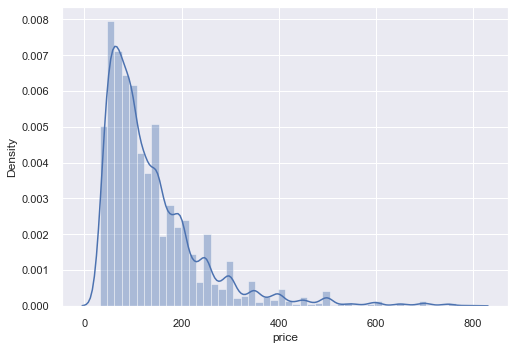

In [29]:
#Check the changed price's distribution.
sns.distplot(bnb_thr['price'])

In [30]:
print("Skewness: %.2f " % bnb_thr['price'].skew())
print("Kurtosis: %.2f " % bnb_thr['price'].kurt())

Skewness: 2.24 
Kurtosis: 7.04 


<AxesSubplot:xlabel='price'>

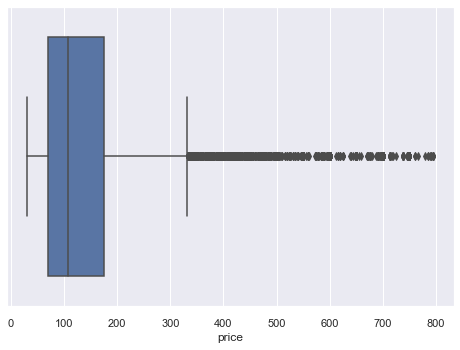

In [31]:
sns.boxplot(bnb_thr['price'])

### 4-3. The most listed host

In [32]:
bnb_thr.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [33]:
top_host = bnb_thr.host_name.value_counts().head(10)
top_host
# Michael was the most listed host.

Michael         410
David           395
Sonder (NYC)    327
John            288
Alex            272
Blueground      232
Sarah           225
Daniel          223
Jessica         200
Maria           198
Name: host_name, dtype: int64

In [34]:
top_host2 = pd.DataFrame(top_host)
top_host2.reset_index(inplace = True)
top_host2.rename(columns = {'index' : 'host_name', 'host_name' : 'count'}, inplace = True)
top_host2

,host_name,count
0,Michael,410
1,David,395
2,Sonder (NYC),327
3,John,288
4,Alex,272
5,Blueground,232
6,Sarah,225
7,Daniel,223
8,Jessica,200
9,Maria,198


[Text(0, 0, 'Michael'),
 Text(1, 0, 'David'),
 Text(2, 0, 'Sonder (NYC)'),
 Text(3, 0, 'John'),
 Text(4, 0, 'Alex'),
 Text(5, 0, 'Blueground'),
 Text(6, 0, 'Sarah'),
 Text(7, 0, 'Daniel'),
 Text(8, 0, 'Jessica'),
 Text(9, 0, 'Maria')]

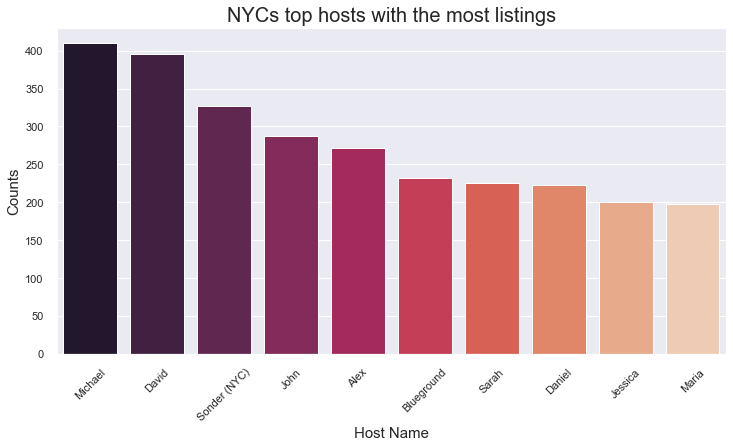

In [35]:
# Represent it as a bar graph

f, ax = plt.subplots(1,1, figsize=(12,6))

sns.barplot(data = top_host2, x = 'host_name', y = 'count', palette='rocket', ax=ax)
ax.set_title('NYCs top hosts with the most listings', size=20)
ax.set_xlabel('Host Name', size=15)
ax.set_ylabel('Counts', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


### 4-4. What is the most expensive room? and the cheapest one?

In [36]:
#bnb[bnb['neighbourhood_group']].unique()
bnb_thr['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [37]:
#idxmax: print out the maximum index
bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()

neighbourhood_group
Bronx             8521
Brooklyn          4428
Manhattan         7017
Queens           14747
Staten Island     3049
Name: price, dtype: int64

In [38]:
# What is the most expensive room according to 'neighbourhood_group'?
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()][['name', 'neighbourhood_group', 'host_name', 'price']]

,name,neighbourhood_group,host_name,price
8521,1 Room in a 2 Bedroom Available,Bronx,Jonathan,680
4428,Unique Brooklyn Brownstone,Brooklyn,Rachel,795
7017,Historic Upper West Side Townhouse,Manhattan,David,795
14747,3 bedroom near Park,Queens,Jackie,750
3049,Spacious center hall colonial,Staten Island,Donna,700


In [39]:
#idxmin: print out the minimum index
bnb_thr.groupby(['neighbourhood_group'])['price'].idxmin()

neighbourhood_group
Bronx             3889
Brooklyn          2887
Manhattan         7431
Queens            6615
Staten Island    30312
Name: price, dtype: int64

In [40]:
# What is the most cheapest room according to 'neighbourhood_group'?
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmin()][['name', 'neighbourhood_group', 'host_name', 'price']]

,name,neighbourhood_group,host_name,price
3889,"A Simple, Calm Space",Bronx,Août,32
2887,Amazing Spacious Room,Brooklyn,Lord Daniel,31
7431,Cozy room right on BROADWAY - Washington Heights,Manhattan,Nga,31
6615,"Super Clean, Quiet & Spacious Room",Queens,Troy,31
30312,Nice room near SI Ferry \n15 minutes by car.,Staten Island,Sara I,31


### 4-5. The price distribution by each regions

Text(0.5, 1.0, 'Prices with different regions')

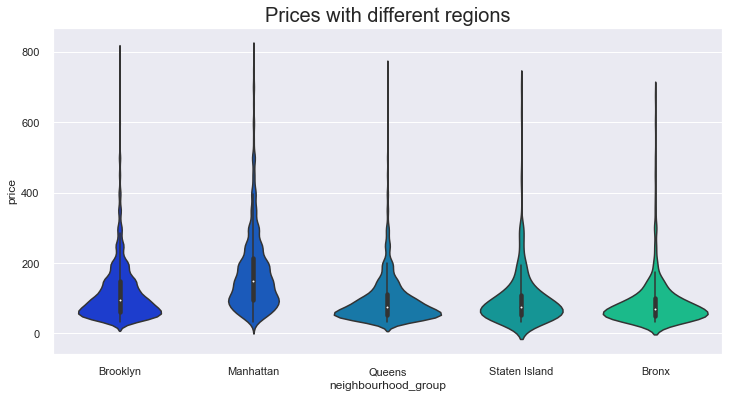

In [41]:
f, ax = plt.subplots(1,1, figsize=(12,6))

sns.violinplot(data = bnb_thr, x='neighbourhood_group', y='price', palette='winter', ax=ax)
plt.title("Prices with different regions", size=20)

#Generally, the price of Manhattan is higher than other regions, 
#and the most rooms were placed near less than $100 per nights. 

### 4-6. The room_type  by each regions

In [42]:
bnb_thr['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [43]:
# Use unstack(0) to visualize clearly after aggregating.
room_type2 = bnb_thr.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
room_type2

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,377,9470,12887,2080,172
Private room,610,9909,7875,3285,177
Shared room,34,279,458,127,4


[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room')]

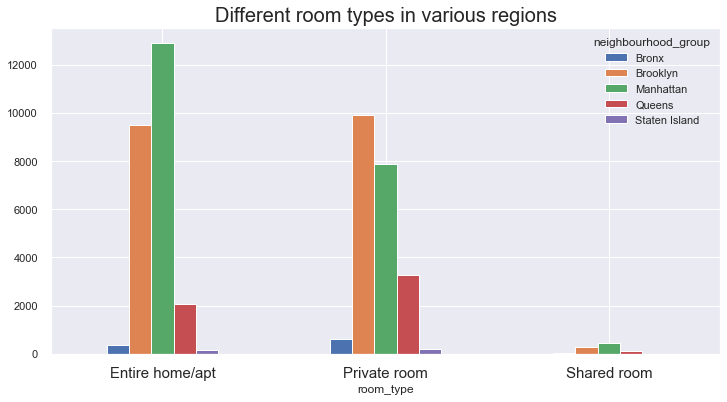

In [44]:
g = room_type2.plot(kind='bar', figsize=(12,6))
g.set_title('Different room types in various regions', size=20)
g.set_xticklabels(g.get_xticklabels(), rotation=0, size=15)

# Manhattan: Entire home/apt was the most recorded
# Brooklyn: Private room was the most recorded
# By and large, The number of Shared room was the smallest.

### 4-7. Which room has a lot of reviews?

In [45]:
# Figure out the top10 rooms that most reviewed rooms in New York.
top10_reviews = bnb.nlargest(10, 'reviews_per_month')
top10_reviews[['name', 'reviews_per_month', 'neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

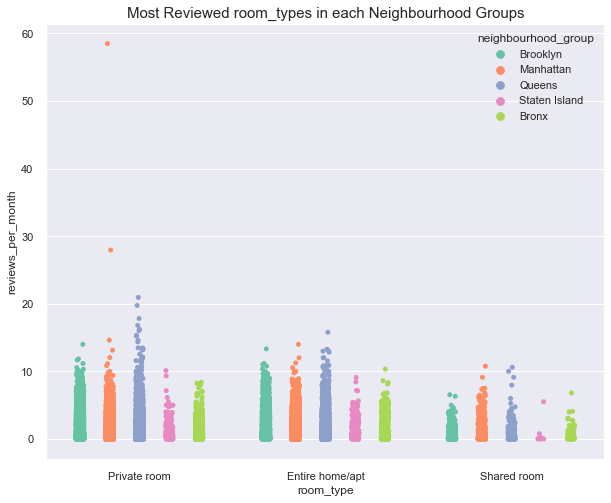

In [46]:
f, ax = plt.subplots(1,1, figsize=(10,8))

sns.stripplot(data = bnb, x = 'room_type', y = 'reviews_per_month',
             hue = 'neighbourhood_group', dodge=True, jitter=True, palette='Set2', ax=ax)
# dodge=True >> divide the data by hue and stack them up
# jitter=True >> change the position of the horizontal axis so that the data do not overlap.

ax.set_title('Most Reviewed room_types in each Neighbourhood Groups', size=15)

# For private rooms, Queens received the most reviews.
# Manhattan and Brooklyn have the same number of reviews.

### How can we utilize 'latitude' and 'longitude' for insights?

### 4-8. Show location on map by latitude and longitude

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

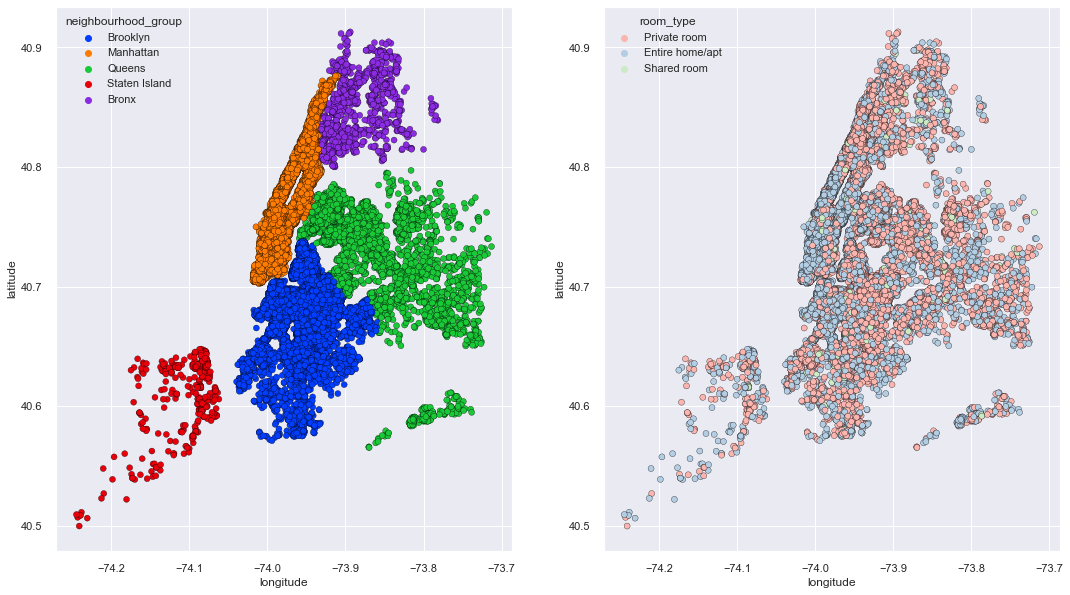

In [47]:
f, ax = plt.subplots(1,2, figsize=(18,10))

sns.scatterplot(data=bnb_thr, x = 'longitude', y = 'latitude', hue='neighbourhood_group', palette = 'bright', edgecolor='black', linewidth=0.3, ax=ax[0])
sns.scatterplot(data=bnb_thr, x = 'longitude', y= 'latitude', hue = 'room_type', palette = 'Pastel1', edgecolor = 'black', linewidth=0.3, ax=ax[1])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

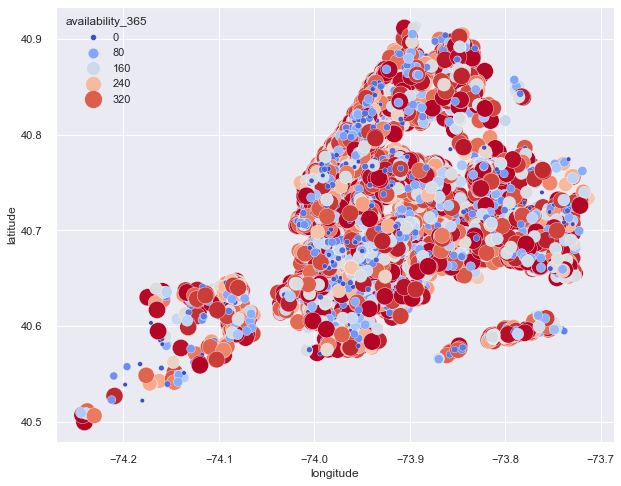

In [48]:
# Representing data by the size of a circle
f, ax = plt.subplots(1,1, figsize=(10, 8 ))

sns.scatterplot(data=bnb_thr, x= 'longitude', y='latitude', hue='availability_365',
               palette='coolwarm',size='availability_365',sizes=(20,300))

## 5. Linear Regression Analysis

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [50]:
bnb_md = bnb

In [51]:
bnb_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [52]:
# let's transform the categorical vairabels by LabelEncoder!
labelencoder = LabelEncoder()
bnb_md['neighbourhood_group'] = labelencoder.fit_transform(bnb_md['neighbourhood_group'])
bnb_md['neighbourhood'] = labelencoder.fit_transform(bnb_md['neighbourhood'])
bnb_md['room_type'] = labelencoder.fit_transform(bnb_md['room_type'])

In [53]:
feature_columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
                  'calculated_host_listings_count', 'availability_365']

In [54]:
# Explanatory variables
X = bnb_md[feature_columns]
# Target Variable
y = bnb_md['price']

# Split the dataset into 7:3 ratio as train and test data
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.7, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(34226, 6) (14669, 6) (34226,) (14669,)


In [55]:
linreg = LinearRegression()
linreg.fit(train_X, train_y)

LinearRegression()

In [56]:
#Check the results,
test_predict = linreg.predict(test_X)
print("Accuracy on test set: {}".format(linreg.score(test_X, test_y)))

Accuracy on test set: 0.0982812073642596


In [57]:
#Check the results 2
test_predict = linreg.predict(test_X)
error = pd.DataFrame(np.array(test_y).flatten(),columns=['Actual'])
error['Prediction'] = np.array(test_predict)
error['Delta'] = abs(error['Actual'] - error['Prediction'])
error.head(10)

,Actual,Prediction,Delta
0,89,212.969220,123.969220
1,30,118.935800,88.935800
2,120,82.817854,37.182146
3,470,249.832620,220.167380
4,199,190.316330,8.683670
5,170,205.642004,35.642004
6,90,93.500288,3.500288
7,60,216.135827,156.135827
8,150,213.647403,63.647403
9,74,199.074906,125.074906


## 6. Review

### AirBnB data i New York:
#### The total number of data:  782320
#### The total number of null values: 20141 and it occupies 2.57% of the total 
#### The number of host_id: 37,457
#### The number of hosts: 11,452 people
#### The average  AirBnB price per nights in New York: $152.72

### Q: *Who is the most listed in AirBnB?
#### A:  Michael was the most listed host. 

##### 1. Michael, 2. David, 3. Sonder 4. John, 5. Alex .....

### Q: *What is the most expensive room? and the cheapest one?
#### A: As above 4-4 section, we can see top 5 rooms in both.

### Q: *Which neighbourhood_group of New York is the most expensive?
#### A: Generally, the price of Manhattan is higher than other regions, and the most rooms were placed near less than $100 per nights.

### Q: *Are there different room_types of Airbnb by region?
#### A: Manhattan: Entire home/apt was the most recorded, Brooklyn: Private room was the most recorded, and the number of Shared room was the smallest.

### Q: *Can we predict the price of AirBnB?
#### A: Yes, but we should be able to be more careful to do it.